In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

# TREx-ATM Forward Calculation with a custom spectrum

Building off the basic TREx-ATM forward example, we can also perform calculations by supplying a custom spectrum. Below, we'll do this using some example spectrum data. Note that the energy and flux arrays must be the same length, and energy and flux values are expected to be floats in eV and 1/cm2/sr/eV, respectively.

Complete documentation describing all caveats can be found in the [`forward()`](https://docs.aurorax.space/code/pyaurorax_api_reference/pyaurorax/models/atm/index.html) function's docs.

In [2]:
ef_count = 11  # number of energy and flux values we want to have
custom_spectrum_arr = np.zeros((2, ef_count), order='F', dtype=np.single)  # 2-D array, first dimension will be energy, second will be flux
for i in range(ef_count):
    custom_spectrum_arr[0, i] = 4000. + i * 100.
    custom_spectrum_arr[1, i] = 1e6

In [3]:
# set parameters
timestamp = datetime.datetime(2021, 11, 4, 6, 0, 0)
latitude = 53.1
longitude = -107.7

# set output flags
output = pyaurorax.models.ATMForwardOutputFlags()
output.set_all_true()

# run model
result = aurorax.models.atm.forward(timestamp, latitude, longitude, output, custom_spectrum=custom_spectrum_arr)

# show results
result.pretty_print()

ATMForwardResult:
  altitudes                                  : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                              : array([6.61679543e-21, 1.40258166e-20, 3.77586139e-20, 1.024 ...])
  emission_1356                              : array([1.18166577e-21, 2.50491171e-21, 6.74335891e-21, 1.829 ...])
  emission_4278                              : array([6.18692518e-17, 5.25445573e-17, 5.25783460e-17, 5.258 ...])
  emission_5577                              : array([5.70205032e-07, 8.14521684e-07, 1.13092574e-06, 1.531 ...])
  emission_6300                              : array([1.86991826e-08, 2.47030805e-08, 4.52991458e-08, 2.623 ...])
  emission_8446                              : array([3.41778001e-18, 2.90576721e-18, 2.91641716e-18, 2.940 ...])
  emission_smile_uvi_lbh                     : array([2.27872687e-18, 1.93542851e-18, 1.93669265e-18, 1.937 ...])
  height_integrated_rayleighs_1304           : 1883.844993
  height_in

Height-integrated Rayleighs:
  427.8nm:        1545.44 R
  557.7nm:        11736.56 R
  630.0nm:        558.15 R
  844.6nm:        750.29 R
  130.4nm:        1883.84 R
  135.6nm:        334.87 R
  SMILE UVI LBH:  56.33 R


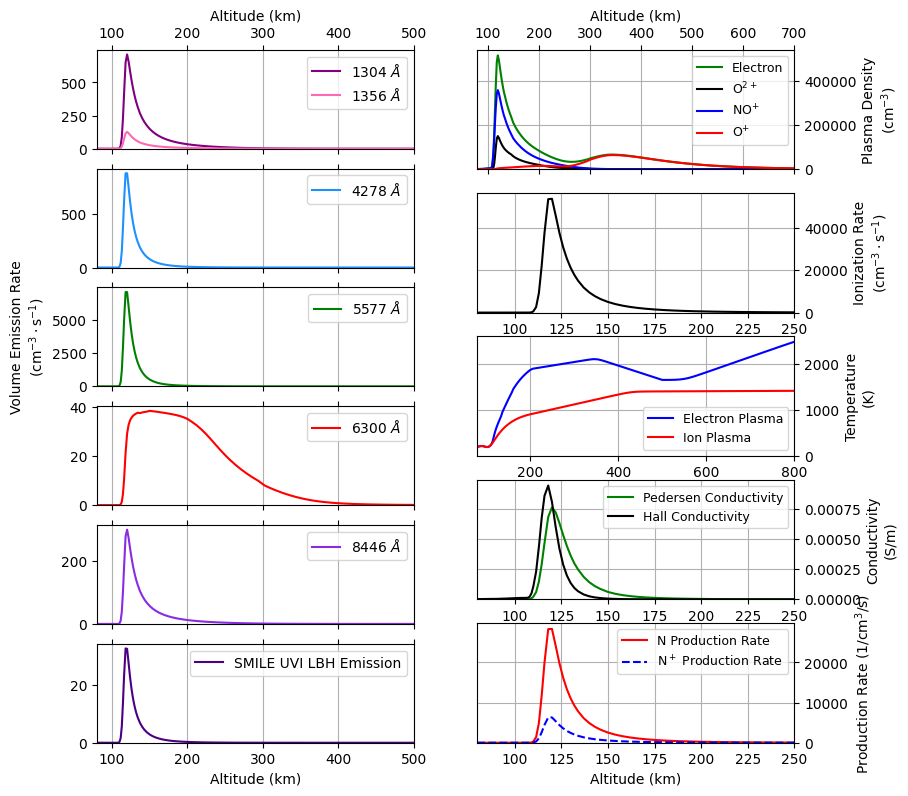

In [4]:
# now let's have a closer look at everything we got back
#
# print all height-integrated Rayleighs data
print("""Height-integrated Rayleighs:
  427.8nm:        %.02f R
  557.7nm:        %.02f R
  630.0nm:        %.02f R
  844.6nm:        %.02f R
  130.4nm:        %.02f R
  135.6nm:        %.02f R
  SMILE UVI LBH:  %.02f R""" %
      (result.height_integrated_rayleighs_4278, result.height_integrated_rayleighs_5577, result.height_integrated_rayleighs_6300,
       result.height_integrated_rayleighs_8446, result.height_integrated_rayleighs_1304, result.height_integrated_rayleighs_1356,
       result.height_integrated_rayleighs_smile_uvi_lbh))

# plot the emission, plasma, and neutral data
#
# we'll do this all in one plot, but made up from many subplots
alt = result.altitudes
fig = plt.figure(figsize=(9, 9))

# plot all the emissions as a column of subplots
#
# 1304 A & 1356 A emission
ax1 = fig.add_subplot(6, 2, 1)
ax1.plot(alt, result.emission_1304, label=r"1304 $\AA$", color="purple")
ax1.plot(alt, result.emission_1356, label=r"1356 $\AA$", color="hotpink")
ax1.legend()
ax1.set_xlim(80, 500)
ax1.set_ylim(bottom=0)
ax1.grid(axis="x")
ax1.set_xlabel("Altitude (km)", va="bottom")
ax1.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax1.xaxis.set_label_position("top")

# blueline emission
ax2 = fig.add_subplot(6, 2, 3)
ax2.plot(alt, result.emission_4278, label=r"4278 $\AA$", color="dodgerblue")
ax2.legend()
ax2.set_xlim(80, 500)
ax2.set_ylim(bottom=0)
ax2.grid(axis="x")
ax2.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# greenline emission
ax3 = fig.add_subplot(6, 2, 5)
ax3.plot(alt, result.emission_5577, label=r"5577 $\AA$", color="green")
ax3.legend()
ax3.set_xlim(80, 500)
ax3.set_ylim(bottom=0)
ax3.grid(axis="x")
ax3.set_ylabel("Volume Emission Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax3.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# redline emission
ax4 = fig.add_subplot(6, 2, 7)
ax4.plot(alt, result.emission_6300, label=r"6300 $\AA$", color="red")
ax4.legend()
ax4.set_xlim(80, 500)
ax4.set_ylim(bottom=0)
ax4.grid(axis="x")
ax4.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# near-infrared 8446 A emission
ax5 = fig.add_subplot(6, 2, 9)
ax5.plot(alt, result.emission_8446, label=r"8446 $\AA$", color="blueviolet")
ax5.legend()
ax5.set_xlim(80, 500)
ax5.set_ylim(bottom=0)
ax5.grid(axis="x")
ax5.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# Lyman-Birge-Hopfield emission (derived by integrating SMILE UVI filter into the ATM model)
ax6 = fig.add_subplot(6, 2, 11)
ax6.plot(alt, result.emission_smile_uvi_lbh, label="SMILE UVI LBH Emission", color="indigo")
ax6.legend()
ax6.set_xlim(80, 500)
ax6.set_ylim(bottom=0)
ax6.grid(axis="x")
ax6.set_xlabel("Altitude (km)")
ax6.tick_params(axis="x", bottom=True, top=True)

# plot the plasma data as a second column of subplots
#
# plasma density
ax7 = fig.add_subplot(5, 2, 2)
ax7.plot(alt, result.plasma_electron_density, label="Electron", color="green")
ax7.plot(alt, result.plasma_o2plus_density, label="O$^{2+}$", color="black")
ax7.plot(alt, result.plasma_noplus_density, label="NO$^{+}$", color="blue")
ax7.plot(alt, result.plasma_oplus_density, label="O$^{+}$", color="red")
ax7.grid()
ax7.set_ylabel("Plasma Density\n(cm$^{-3}$)")
ax7.legend(fontsize=9)
ax7.set_xlim(80, 700)
ax7.set_ylim(bottom=0)
ax7.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax7.set_xlabel("Altitude (km)")
ax7.xaxis.set_label_position("top")
ax7.yaxis.set_label_position("right")
ax7.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma ionisation rate
ax8 = fig.add_subplot(5, 2, 4)
ax8.plot(alt, result.plasma_ionisation_rate, color="black")
ax8.grid()
ax8.set_ylabel("Ionization Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax8.set_xlim(80, 250)
ax8.set_ylim(bottom=0)
ax8.yaxis.set_label_position("right")
ax8.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma temperatures
ax9 = fig.add_subplot(5, 2, 6)
ax9.plot(alt, result.plasma_electron_temperature, label="Electron Plasma", color="blue")
ax9.plot(alt, result.plasma_ion_temperature, label="Ion Plasma", color="red")
ax9.grid()
ax9.legend(fontsize=9)
ax9.set_ylabel("Temperature\n(K)")
ax9.set_xlim(80, 800)
ax9.set_ylim(bottom=0)
ax9.yaxis.set_label_position("right")
ax9.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma conductivities
ax10 = fig.add_subplot(5, 2, 8)
ax10.plot(alt, result.plasma_pedersen_conductivity, label="Pedersen Conductivity", color="green")
ax10.plot(alt, result.plasma_hall_conductivity, label="Hall Conductivity", color="black")
ax10.grid()
ax10.legend(fontsize=9)
ax10.set_ylabel("Conductivity\n(S/m)")
ax10.set_xlim(80, 250)
ax10.set_ylim(bottom=0)
ax10.set_xlabel("Altitude (km)")
ax10.yaxis.set_label_position("right")
ax10.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# some production rates
ax10 = fig.add_subplot(5, 2, 10)
ax10.plot(alt, result.production_rate_n, label="N Production Rate", color="red")
ax10.plot(alt, result.production_rate_nplus, label="N$^+$ Production Rate", color="blue", linestyle="--")
ax10.grid()
ax10.legend(fontsize=9)
ax10.set_ylabel("Production Rate (1/cm$^3$/s)")
ax10.set_xlim(80, 250)
ax10.set_ylim(bottom=0)
ax10.set_xlabel("Altitude (km)")
ax10.yaxis.set_label_position("right")
ax10.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# render the plot
plt.show()